https://github.com/gogundur/Pyspark-Logistic-Regression/blob/master/Pyspark/Pyspark%20Classification.ipynb

In [57]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [58]:
df = spark.read.csv("data/diabetes.csv",inferSchema=True,header=True)
df.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [59]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [60]:
df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [61]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=[
    'Pregnancies','Glucose','BloodPressure',
    'SkinThickness','Insulin','BMI',
    'DiabetesPedigreeFunction','Age'],outputCol='features')
output=assembler.transform(df)
output.select('features','Outcome').show(5)


+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|[6.0,148.0,72.0,3...|      1|
|[1.0,85.0,66.0,29...|      0|
|[8.0,183.0,64.0,0...|      1|
|[1.0,89.0,66.0,23...|      0|
|[0.0,137.0,40.0,3...|      1|
+--------------------+-------+
only showing top 5 rows



In [62]:
#final data consist of features and label which is crew.
final_data=output.select('features','Outcome')
#splitting data into train and test
train_data,test_data=final_data.randomSplit([0.7,0.3])
train_data.describe().show()

+-------+-------------------+
|summary|            Outcome|
+-------+-------------------+
|  count|                542|
|   mean|0.36531365313653136|
| stddev| 0.4819628242061407|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [63]:
test_data.describe().show()

+-------+-------------------+
|summary|            Outcome|
+-------+-------------------+
|  count|                226|
|   mean|0.30973451327433627|
| stddev| 0.4634104687389713|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [64]:
from pyspark.ml.classification import LogisticRegression
logistic_reg = LogisticRegression(featuresCol = 'features', labelCol = 'Outcome',maxIter=5)
logistic_reg_Model = logistic_reg.fit(train_data)

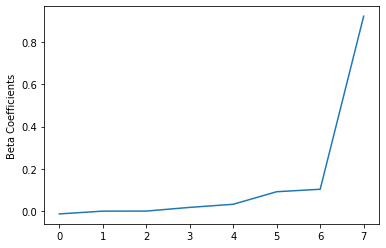

In [65]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(logistic_reg_Model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [66]:
predictions = logistic_reg_Model.transform(test_data)
predictions.show()

+--------------------+-------+--------------------+--------------------+----------+
|            features|Outcome|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|(8,[1,5,6,7],[117...|      0|[-0.4888237015840...|[0.38017071262665...|       1.0|
|(8,[1,5,6,7],[119...|      1|[0.64300708886963...|[0.65543290045991...|       0.0|
|(8,[1,5,6,7],[131...|      1|[-0.8746229802018...|[0.29429326734863...|       1.0|
|(8,[1,6,7],[94.0,...|      0|[4.26602548286395...|[0.98615685804459...|       0.0|
|[0.0,57.0,60.0,0....|      0|[3.15076100748109...|[0.95893869714391...|       0.0|
|[0.0,78.0,88.0,29...|      0|[2.59295934082120...|[0.93040707793083...|       0.0|
|[0.0,86.0,68.0,32...|      0|[2.25228933233334...|[0.90484782535029...|       0.0|
|[0.0,93.0,60.0,25...|      0|[2.39123555846571...|[0.91615652479096...|       0.0|
|[0.0,95.0,64.0,39...|      0|[1.10618356214454...|[0.75141692502644...|    

# Model Evaluation

In [67]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator= BinaryClassificationEvaluator(labelCol="Outcome")
accuracy= evaluator.evaluate(predictions)
print(accuracy)

0.8607142857142858
